## Airline Passenger Data


The data is provided by an airline company. The data is gathered by a customer
satisfaction survey

### Context  
Improving passenger satisfaction is crucial for various reasons. Firstly, satisfied passengers are more likely to become loyal customers and recommend the services to others, leading to increased customer retention and positive word-of-mouth marketing. Secondly, analyzing passenger satisfaction data allows organizations to identify pain points and areas for improvement, enabling them to make data-driven decisions and enhance the overall passenger experience. By leveraging data to understand and address passenger needs, companies can strive for continuous improvement and maintain a competitive edge in the industry.

The train dataset contains 103,904 instances and 25 attributes, of which 20 are quantitative input variables, 4 are qualitative input variables, and 1 qualitative output variable. The test dataset contains 25,976 instances and the same number of attributes as the train dataset. Furthermore, the dataset contains a total of 393 missing values and is in raw form.  

### Content
The feature set includes:
* ID: The unique ID number.
* Gender: Gender of the passengers - Female, Male.
* Customer Type: The customer type - Loyal customer, disloyal customer.
* Age: The age of the passengers.
* Type of Travel: Purpose of the flight of the passengers - Personal Travel, Business Travel.
* Class: Travel class in the plane of the passengers - Business, Eco, Eco Plus.
* Flight distance: The flight distance of this journey.
* Inflight wifi service: Satisfaction level of the inflight wifi service - 0: Not Applicable; 1-5.
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient.
* Ease of Online booking: Satisfaction level of online booking.
* Gate location: Satisfaction level of Gate location.
* Food and drink: Satisfaction level of Food and drink.
* Online boarding: Satisfaction level of online boarding.
* Seat comfort: Satisfaction level of Seat comfort.
* Inflight entertainment: Satisfaction level of inflight entertainment.
* On-board service: Satisfaction level of On-board service.
* Leg room service: Satisfaction level of Leg room service.
* Baggage handling: Satisfaction level of baggage handling.
* Check-in service: Satisfaction level of Check-in service.
* Inflight service: Satisfaction level of inflight service.
* Cleanliness: Satisfaction level of Cleanliness.
* Departure Delay in Minutes: Minutes delayed when departure.
* Arrival Delay in Minutes: Minutes delayed when Arrival.
* Satisfaction: Airline satisfaction level - Satisfaction, neutral, or dissatisfaction.

we will be using CatBoostClassifier so install it using the following command,
because it is not preinstalled here.

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
# Import data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #You can use the warnings.filterwarnings("ignore") statement to temporarily suppress all warnings in a specific code section. warnings.filterwarnings("ignore")

# Import feature engineering libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
# The RandomOverSampler class is specifically designed to address this issue by oversampling the minority class.
# It randomly selects samples from the minority class and duplicates them to increase their representation in the dataset. This helps to balance the class distribution and provides more training examples for the minority class.
from imblearn.over_sampling import RandomOverSampler
#The RandomUnderSampler class is specifically designed to tackle this issue by randomly selecting samples from the majority class to reduce its
# representation in the dataset. This helps to balance the class distribution and provides a more equal representation of both classes during model training.
from imblearn.under_sampling import RandomUnderSampler

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Import classifcation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
#The XGBClassifier leverages gradient boosting to train an ensemble of weak prediction models (decision trees) sequentially.
# It combines their predictions to form a strong predictive model. Gradient boosting is known for its ability to handle complex relationships in data and produce highly accurate models.
from xgboost import XGBClassifier
#CatBoostClassifier is optimized for handling categorical features automatically. It can process categorical variables directly, without the need for explicit label encoding or one-hot encoding. This makes it convenient when working
 # with datasets that have a large number of categorical features.
from catboost import CatBoostClassifier

In [ ]:
# Load the datasets
train_data = pd.read_csv("airline_passenger_data.csv")
data = pd.read_csv("airline_passenger_data.csv")
test_data = data.sample(frac=0.3, random_state=42)


# Create a copy of the datasets
train_df = train_data.copy()
test_df = test_data.copy()

# Define the target variable
TARGET = "satisfaction"

In [ ]:
# Print the shape of the datasets
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"The test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The train dataset has 103904 rows and 25 columns.
The test dataset has 31171 rows and 25 columns.


In [ ]:
# Show the first 5 rows of the training dataset
train_df.head()

,Sr No.,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Return general information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Sr No.                             103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
# Return the number of missing values for each column
train_df.isna().sum()

Sr No.                                 0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
# Return the number of missing values for each column
test_df.isna().sum()

Sr No.                                0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             91
satisfaction                          0


In [ ]:
# Return descriptive statistics of the dataset
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sr No.,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [ ]:
# Drop the "Sr No. " and "id" columns from the dataset, given that both columns are irrelevant
train_df.drop(columns=["Sr No.", "id"], axis=1, inplace=True)
test_df.drop(columns=["Sr No.", "id"], axis=1, inplace=True)

The purpose of below function is to divide the columns of a DataFrame into discrete and continuous categories based on the number of unique values in each column. Columns with a number of unique values less than or equal to the specified threshold are considered discrete, while the remaining columns are considered continuous. This can be useful for further analysis or processing based on the nature of the data in each column.

In [ ]:
def select_columns(df: pd.DataFrame, threshold: int = 10) -> list[str]:
    """
    Function used to divide the columns of a DataFrame in discrete and continuous based on the specified threshold.

    Args:
        df (pd.DataFrame): A DataFrame containing the columns to be selected.
        threshold (int): A threshold defining the minimum number of unique values. Default is 10.

    Returns:
        discrete_columns (list[str]): A list of discrete column names.
        continuous_columns (list[str]): A list of continuous column names.
    """

    # Initialize the discrete columns list
    discrete_columns = []

    for column in df.columns:
        # Select the columns with number of unique values less than or equal to the threshold
        if df[column].nunique() <= threshold:
            # Append the selected columns to the list of discrete columns
            discrete_columns.append(column)

    # Select the continuous columns
    continuous_columns = [col for col in df.columns.tolist() if col not in discrete_columns]


    return discrete_columns, continuous_columns

In [ ]:
# Apply the select_columns function
discrete_columns, continuous_columns = select_columns(train_df)

In [ ]:
# Return the discrete and continuous columns
discrete_columns, continuous_columns

(['Gender',
  'Customer Type',
  'Type of Travel',
  'Class',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'satisfaction'],
 ['Age',
  'Flight Distance',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

In [ ]:
def visualizations_discrete(df: pd.DataFrame):
    """
    Function used to plot countplots for each discrete column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
    """

    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(discrete_columns), ncols=2, figsize=(12, 6 * len(discrete_columns)))
    fig.subplots_adjust(hspace=0.25)
    sns.color_palette("Blues", as_cmap=True)

    for index, column in enumerate(discrete_columns):
        # Plot countplot
        sns.countplot(data=df, x=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Countplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot countplot
        sns.countplot(data=df, x=column, hue=TARGET, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Countplot of {column} specified by {TARGET}")
        axes[index, 1].set_xlabel("")

    # Show the plot
    plt.show()

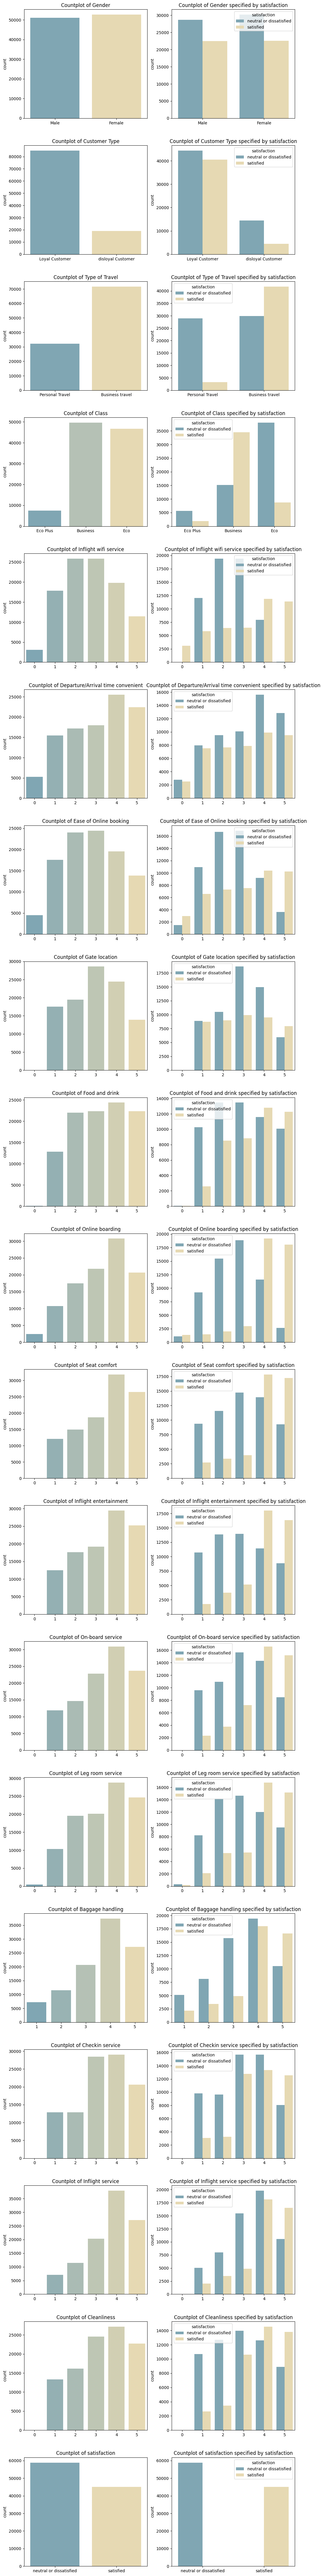

In [ ]:
# Apply the visualizations_discrete function
visualizations_discrete(train_df)

Based on the figures above, the following conclusions can be drawn:
* Gender is not an important predictor for satisfaction.
* The proportion of loyal customers is extremely high. However, a large percentage of loyal customers is neutral or dissatisfied.
* Business travel has a significantly higher percentage of satisfied customers compared to personal travel. The same applies to the type of class, where business class has a higher percentage of satisfied customers compared to eco and eco plus.
* For all other predictors, the increase in service results in a higher percentage of satisfied customers.

In [ ]:
def visualizations_continuous(df: pd.DataFrame, target: str):
    """
    Function used to plot the boxplot and distribution for each continuous column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - target (str): The target variable of a DataFrame.
    """

    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 6 * len(continuous_columns)))
    fig.tight_layout(pad=2.0)

    for index, column in enumerate(continuous_columns):
        # Plot boxplot
        sns.boxplot(data=df, x=TARGET, y=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot distribution
        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")

    # Show the plot
    plt.show()

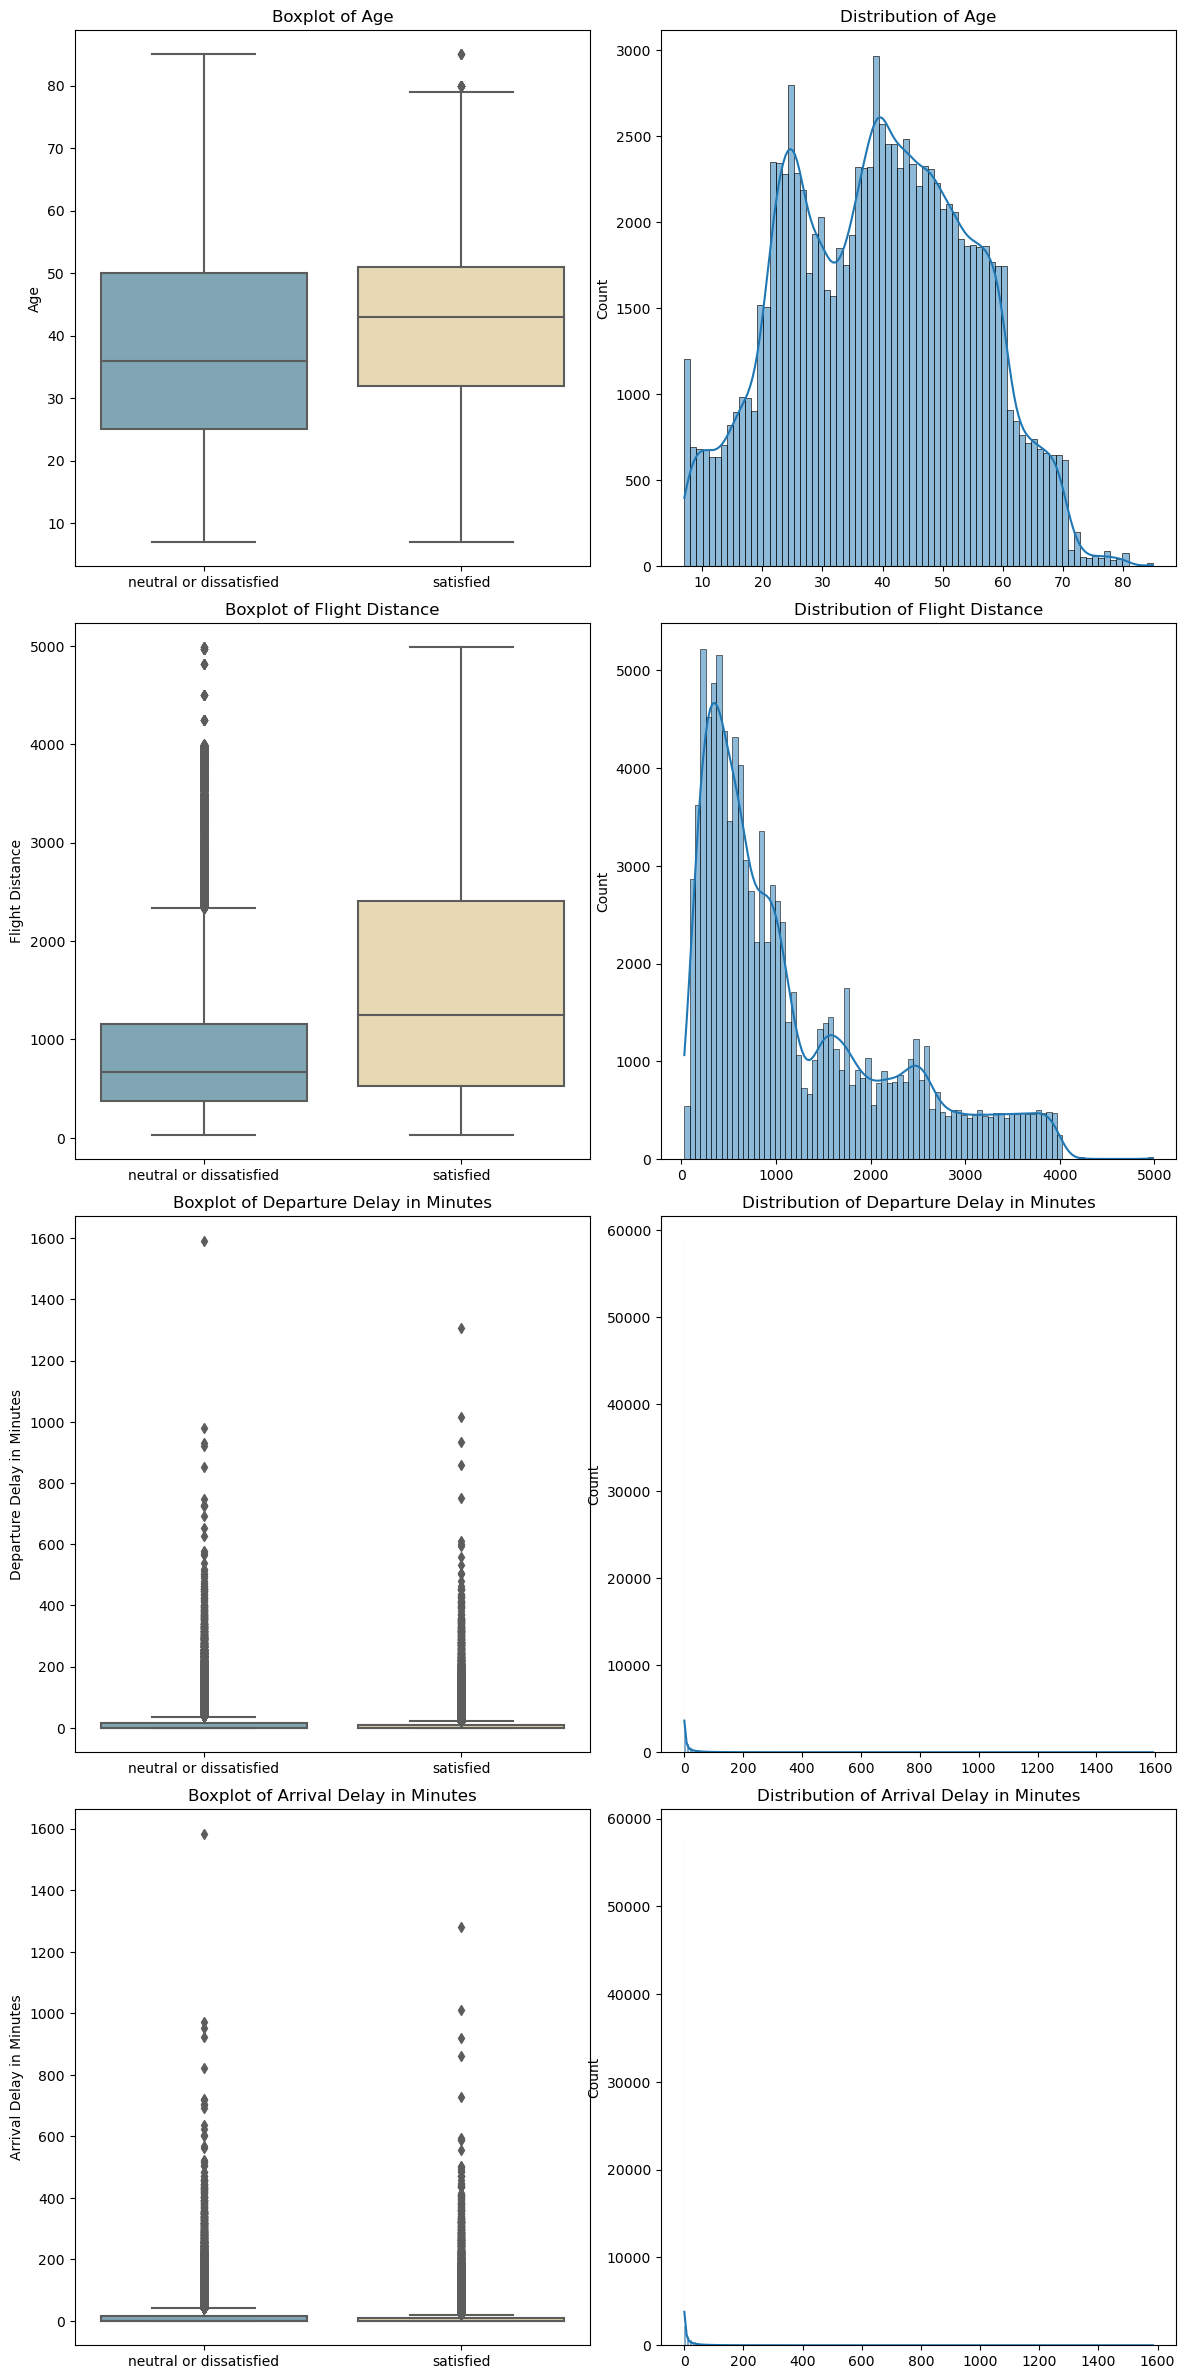

In [ ]:
# Apply the visualizations_continuous function
visualizations_continuous(train_df, target=TARGET)

Based on the figures above, the following conclusions can be drawn:
* Age is not an important predictor of satisfaction. Furthermore, the number of travelers in the 30 to 40 age group seems to be decreasing.
* Flight distance seems to affect satisfaction. The boxplot suggests that passengers who traveled longer distances are generally more satisfied compared to those who traveled shorter distances.

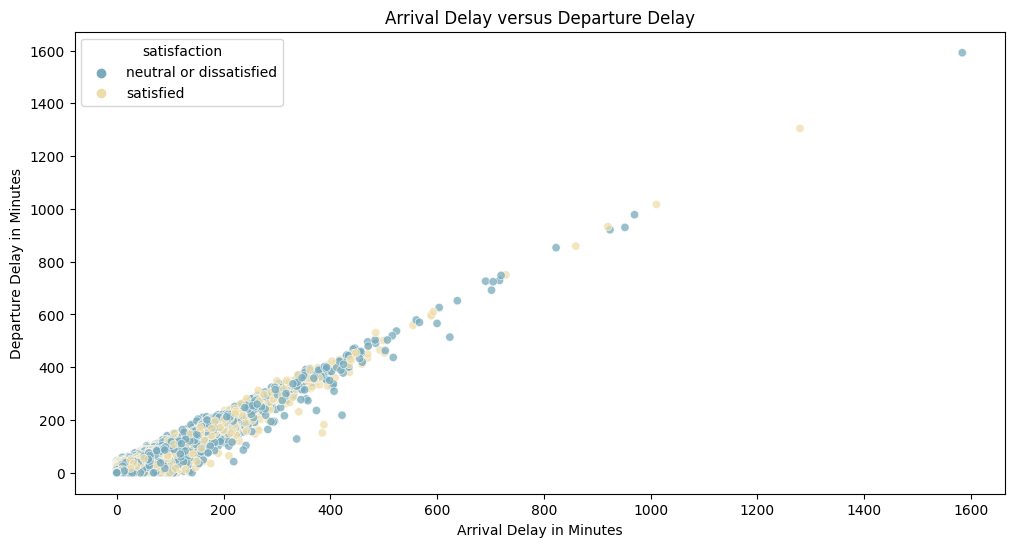

In [ ]:
# Set the figure size and layout
plt.figure(figsize=(12,6), dpi=100)
plt.tight_layout(pad=2.0)

# Plot the relationship between arrival and departure delay
sns.scatterplot(data=train_df, x="Arrival Delay in Minutes", y="Departure Delay in Minutes", hue="satisfaction", palette="blend:#7AB,#EDA", alpha=0.75)
plt.title("Arrival Delay versus Departure Delay")

# Show the plot
plt.show()

Based on the figure above, the relationship between arrival and departure delay appears to be linear. After 800 minutes of delay, 4 out of 9 passengers are still satisfied.

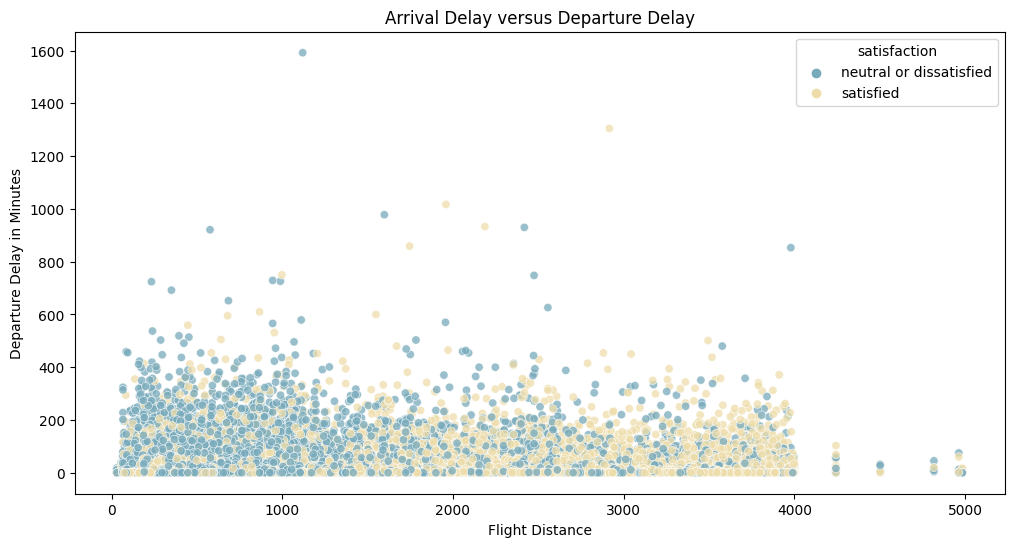

In [ ]:
# Set the figure size and layout
plt.figure(figsize=(12,6), dpi=100)
plt.tight_layout(pad=2.0)

# Plot the relationship between arrival and departure delay
sns.scatterplot(data=train_df, x="Flight Distance", y="Departure Delay in Minutes", hue="satisfaction", palette="blend:#7AB,#EDA", alpha=0.75)
plt.title("Arrival Delay versus Departure Delay")

# Show the plot
plt.show()

Based on the above figure, it can be concluded that the majority of passengers accept a slight departure delay. This means that departure delay has less of a negative effect on satisfaction for long distance flights compared to short distance flights.

In [ ]:
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    """
    Function used to replace outliers in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - inner_fence_multiplier (float): A multiplier to determine the inner fence. Default is 1.5.
        - outer_fence_multiplier (float): A multiplier to determine the outer fence. Default is 3.0.

    Returns:
        - df (pd.DataFrame): A DataFrame with outliers replaced by the mean value.
    """

    for column in continuous_columns:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()


    return df

In [ ]:
# Apply the replace_outliers function to the datasets
train_df = replace_outliers(train_df)
test_df = replace_outliers(test_df)

In [ ]:
def replace_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function used to replace missing values in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.

    Returns:
        - df (pd.DataFrame): A DataFrame without missing values.
    """

    for column in continuous_columns:
        # Select the columns with missing values
        if df[column].isnull().any():
            # Replace the missing values with the mean value
            df[column] = df[column].fillna(df[column].mean())


    return df

In [ ]:
# Apply the replace_missing_values function to the datasets
train_df = replace_missing_values(train_df)
test_df = replace_missing_values(test_df)

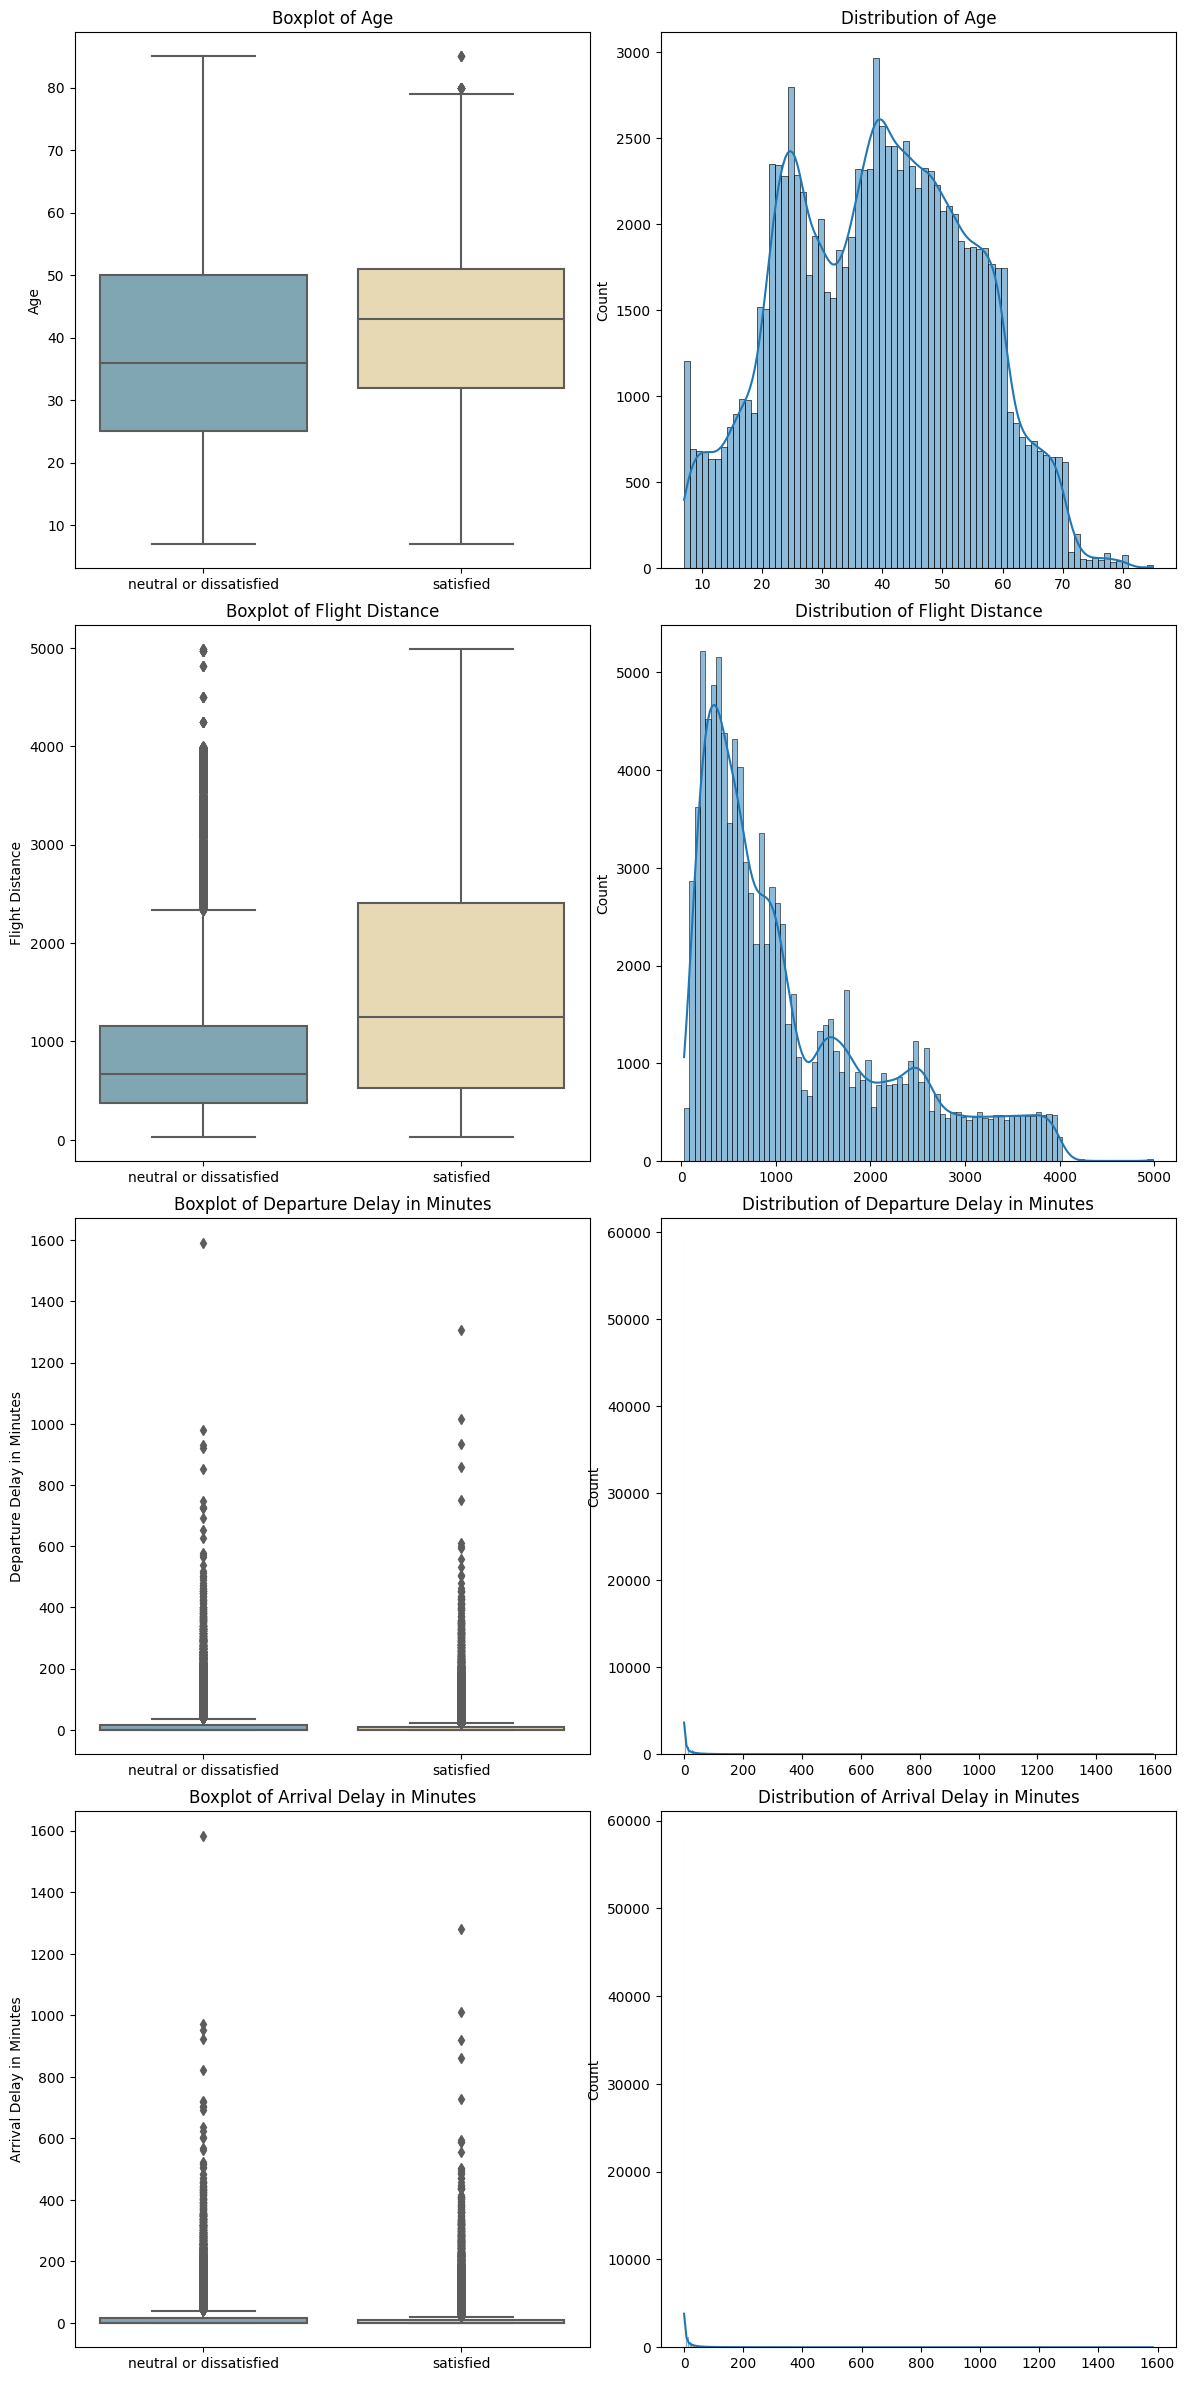

In [ ]:
# Re-apply the visualizations_continuous function
visualizations_continuous(train_df, target=TARGET)

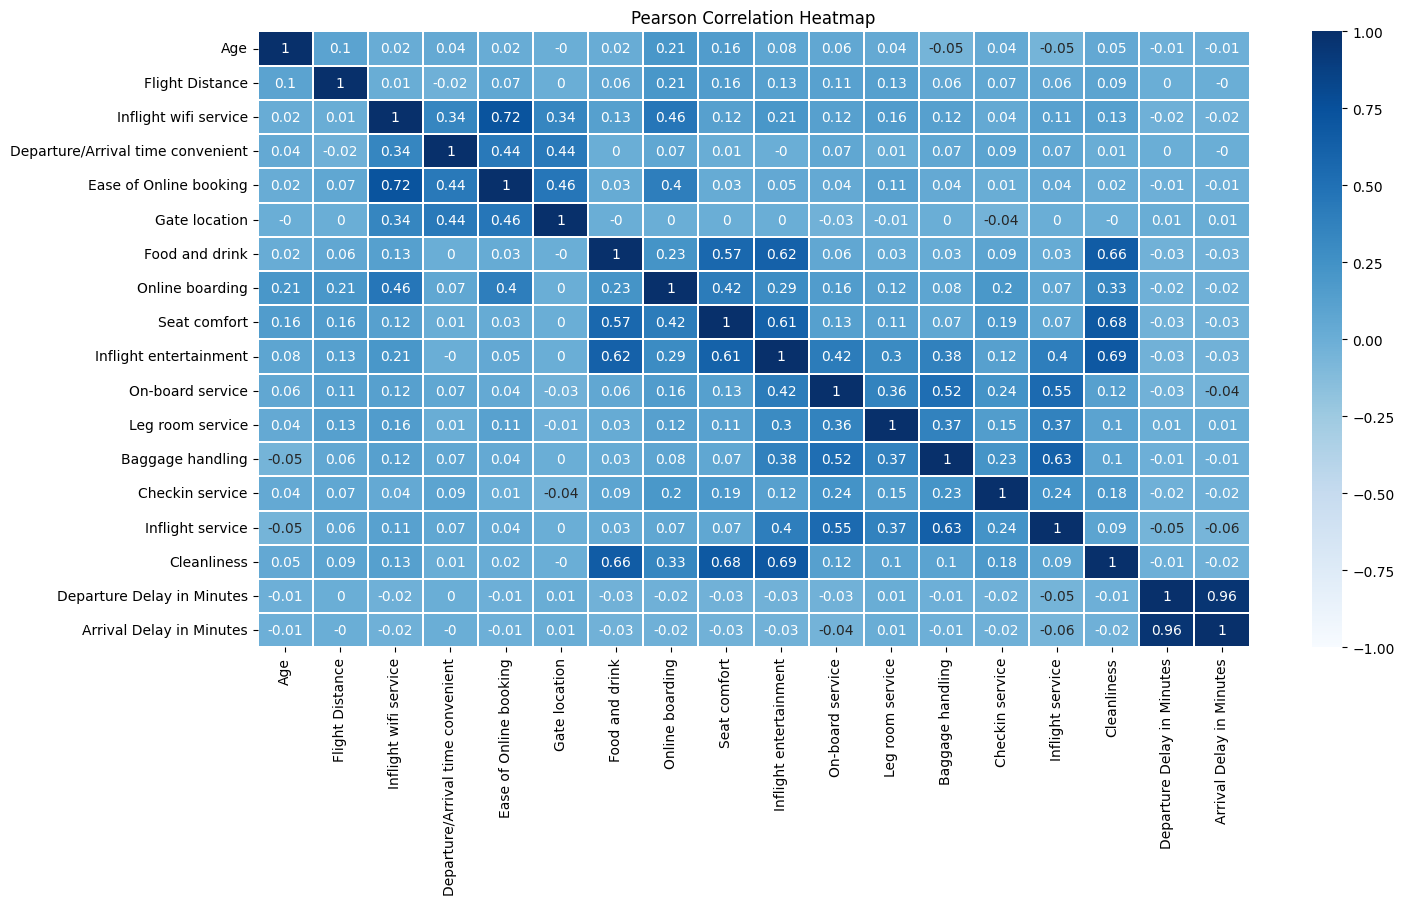

In [ ]:
# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the correlation between the features
corr_matrix = train_df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.2, fmt=".2g", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")

# Show the plot
plt.show()

Conclusion From Above Figure :

* Inflight wifi serivice is higly positively correlated (with factor 0.72) with
Ease of online booking.
* Food and drink higly affect the Inflight Entertainment and Cleanliness.
* Seat Comfort is affected by clenliness and Inflight Entertainment.


In [ ]:
# Define the label enconder and the ordinal enconder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Columns for label and ordinal encoding
label_columns = ["Type of Travel", "satisfaction"]
ordinal_columns = ["Customer Type", "Class"]

# Apply the label encoder
train_df[label_columns] = train_df[label_columns].apply(label_encoder.fit_transform)
test_df[label_columns] = test_df[label_columns].apply(label_encoder.fit_transform)

# Apply the ordinal encoder
train_df[ordinal_columns] = ordinal_encoder.fit_transform(train_df[ordinal_columns])
test_df[ordinal_columns] = ordinal_encoder.fit_transform(test_df[ordinal_columns])

Based on the visualizations, it can be concluded that age and gender have little influence on satisfaction. Therefore, both columns are removed from the dataset.

In [ ]:
# Drop the "Age" and "Gender" columns from the dataset, given that both columns are irrelevant
train_df.drop(["Age", "Gender"], axis=1, inplace=True)
test_df.drop(["Age", "Gender"], axis=1, inplace=True)

In [ ]:
# Split the dataset into X_train, X_test, y_train, and y_test
X_train = train_df.drop(columns=[TARGET], axis=1)
X_test = test_df.drop(columns=[TARGET], axis=1)
y_train = train_df[TARGET]
y_test = test_df[TARGET]

In [ ]:
# Return the size of X_train and X_test
print(f"Size of training data: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"Size of testing data: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

Size of training data: 103904 rows and 20 columns.
Size of testing data: 31171 rows and 20 columns.


In [ ]:
# Define the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Prespecify the random state
RANDOM_STATE = 2

In [ ]:
# Define the oversampler
oversampler = RandomOverSampler(random_state=RANDOM_STATE)

# Oversample the minority class
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Define the undersampler
undersampler = RandomUnderSampler(random_state=RANDOM_STATE)

# Undersample the majority class
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

In [ ]:
# Define the base models to be trained and evaluated
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=RANDOM_STATE),
    "XGBClassifier": XGBClassifier(random_state=RANDOM_STATE),
    "BaggingClassifier": BaggingClassifier(random_state=RANDOM_STATE),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "CatBoostClassifier": CatBoostClassifier(random_state=RANDOM_STATE, verbose=50),
}

In [ ]:
def train_and_evaluate_models_with_sampling(models: dict) -> pd.DataFrame:
    """
    Function used to fit, predict, and evaluate different models using both oversampling and undersampling.

    Parameters:
        - models (dict): A dictionary of model names and model objects.

    Returns:
        - base_results (pd.DataFrame): A DataFrame containing the performance for each base model.
    """

    # Initialize the base results DataFrame
    base_results = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "F1"])

    for model_name, model in models.items():
    # Train the model on oversampled data
        # Fit the model
        model.fit(X_train_oversampled, y_train_oversampled)

        # Predict the target variable
        y_pred_oversampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_oversampled = round(accuracy_score(y_test, y_pred_oversampled),3)
        recall_oversampled = round(recall_score(y_test, y_pred_oversampled),3)
        precision_oversampled = round(precision_score(y_test, y_pred_oversampled),3)
        f1_oversampled = round(f1_score(y_test, y_pred_oversampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Oversampled)"] = [accuracy_oversampled, recall_oversampled,
                                                      precision_oversampled, f1_oversampled]

    # Train the model on undersampled data
        # Fit the model
        model.fit(X_train_undersampled, y_train_undersampled)

        # Predict the target variable
        y_pred_undersampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_undersampled = round(accuracy_score(y_test, y_pred_undersampled),3)
        recall_undersampled = round(recall_score(y_test, y_pred_undersampled),3)
        precision_undersampled = round(precision_score(y_test, y_pred_undersampled),3)
        f1_undersampled = round(f1_score(y_test, y_pred_undersampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Undersampled)"] = [accuracy_undersampled, recall_undersampled,
                                                       precision_undersampled, f1_undersampled]

    # Sort the base results in descending order of accuracy
    base_results.sort_values(by="Accuracy", ascending=False, inplace=True)


    return base_results

In [ ]:
# Apply the train_and_evaluate_models_with_sampling function
results = train_and_evaluate_models_with_sampling(base_models)

Learning rate set to 0.078931
0:	learn: 0.5892811	total: 80.3ms	remaining: 1m 20s
50:	learn: 0.1270313	total: 1.6s	remaining: 29.8s
100:	learn: 0.1038771	total: 3.1s	remaining: 27.6s
150:	learn: 0.0961551	total: 4.58s	remaining: 25.8s
200:	learn: 0.0912244	total: 6.11s	remaining: 24.3s
250:	learn: 0.0876534	total: 7.62s	remaining: 22.7s
300:	learn: 0.0849266	total: 9.37s	remaining: 21.7s
350:	learn: 0.0822158	total: 12.1s	remaining: 22.3s
400:	learn: 0.0797738	total: 13.5s	remaining: 20.2s
450:	learn: 0.0779179	total: 15s	remaining: 18.3s
500:	learn: 0.0761379	total: 16.5s	remaining: 16.4s
550:	learn: 0.0748038	total: 18s	remaining: 14.6s
600:	learn: 0.0732229	total: 19.5s	remaining: 12.9s
650:	learn: 0.0721265	total: 20.9s	remaining: 11.2s
700:	learn: 0.0708951	total: 23.4s	remaining: 9.99s
750:	learn: 0.0695697	total: 25.3s	remaining: 8.4s
800:	learn: 0.0682707	total: 26.8s	remaining: 6.67s
850:	learn: 0.0671048	total: 28.3s	remaining: 4.96s
900:	learn: 0.0658114	total: 29.9s	remaini

In [ ]:
# Show the results of the trained and evaluated models
results

,Accuracy,Recall,Precision,F1
Random Forest Classifier (Oversampled),1.000,1.000,1.000,1.000
BaggingClassifier (Oversampled),0.997,0.995,0.999,0.997
Random Forest Classifier (Undersampled),0.996,1.000,0.990,0.995
BaggingClassifier (Undersampled),0.992,0.994,0.988,0.991
CatBoostClassifier (Oversampled),0.974,0.963,0.977,0.970
XGBClassifier (Oversampled),0.973,0.961,0.976,0.968
CatBoostClassifier (Undersampled),0.972,0.963,0.974,0.968
XGBClassifier (Undersampled),0.971,0.963,0.971,0.967
GradientBoostingClassifier (Oversampled),0.944,0.934,0.937,0.936
GradientBoostingClassifier (Undersampled),0.943,0.933,0.937,0.935


In [ ]:
# Define the Random Forest Classifier
model = RandomForestClassifier(random_state=RANDOM_STATE)

# Fit the model to the data
model.fit(X_train_oversampled, y_train_oversampled)

# Predict the target variable
y_pred_oversampled = model.predict(X_test_scaled)

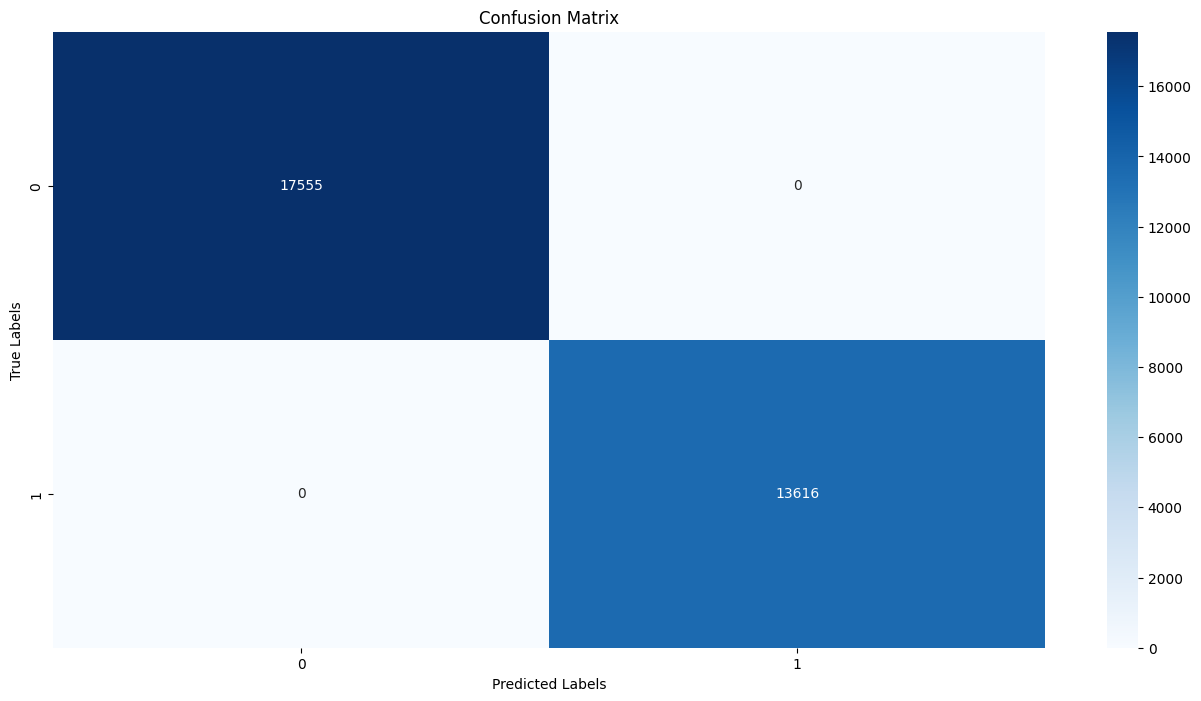

In [ ]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred_oversampled)

# Create a DataFrame from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=np.unique(train_df[TARGET]), columns=np.unique(train_df[TARGET]))

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Create a heatmap for the confusion matrix
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

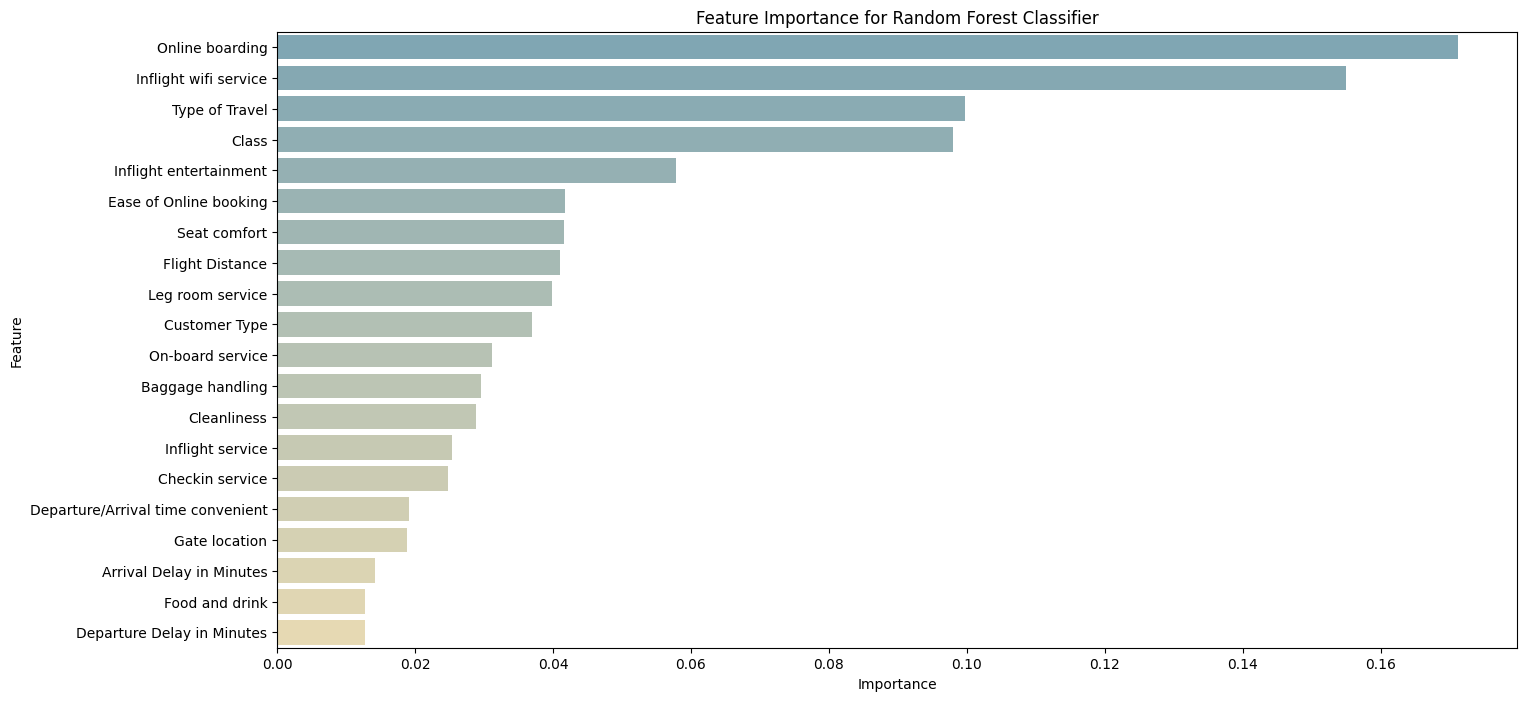

In [ ]:
# Retrieve the feature importances
feature_importance = model.feature_importances_

# Initialize a DataFrame with feature names and the corresponding importance values
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h", palette="blend:#7AB,#EDA")

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")

# Show the plot
plt.show()